<a href="https://colab.research.google.com/github/JHJ4012/tensorflow_studying/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost= 2.676105335
Epoch: 0002 cost= 1.107695017
Epoch: 0003 cost= 0.881633548
Epoch: 0004 cost= 0.770631252
Epoch: 0005 cost= 0.700516002
Epoch: 0006 cost= 0.650559165
Epoch: 0007 cost= 0.613199308
Epoch: 0008 cost= 0.583249921
Epoch: 0009 cost= 0.558667650
Epoch: 0010 cost= 0.537876921
Epoch: 0011 cost= 0.520555498
Epoch: 0012 cost= 0.504957774
Epoch: 0013 cost= 0.491549103
Epoch: 0014 cost= 0.479680855
Epoch: 0015 cost= 0.469491183
Accuracy:  0.8888
Label:  [9]
Prediction: [9]


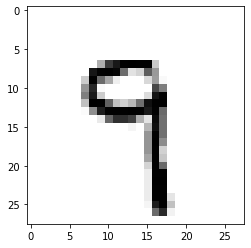

In [7]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import random

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

nb_classes = 10

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X,W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

#Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y,1))
#Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

training_epochs = 15  #epoch이라는 것은 전체 데이터셋을 한 번 학습을 한 것을 1 epoch이라고 함
batch_size = 100

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)  #전체 데이터셋에서 batch_size로 나눠서 몇 번 돌면 1 epoch이 되는가를 계산 

    for i in range(total_batch):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      c, _ = sess.run([cost, optimizer], feed_dict = {X : batch_xs, Y : batch_ys})
      avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost=', '{:.9f}'.format(avg_cost))

  #test
  print("Accuracy: ", accuracy.eval(session = sess, feed_dict = {X: mnist.test.images, Y: mnist.test.labels}))
  #mnist에서 랜덤으로 이미지 가져와 예측해보기
  r = random.randint(0, mnist.test.num_examples -1)
  print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
  print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X:mnist.test.images[r:r+1]}))
  plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap='Greys', interpolation='nearest')
  plt.show()